### Import libraries 

In [276]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
random_seed = 211086

### Import dataset

In [277]:
ikea_data = pd.read_csv(r"C:\Users\Stefanos\Downloads\Lab3\ikea_kommun_data.txt", sep='\t', encoding="unicode_escape")
ikea_data

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


### Checking for NaN values

In [278]:
ikea_data.isna().sum()

Kommun_code              0
Year                     0
Kommun_name              0
Revenue                  0
Employee                 0
Population               0
Population_University    0
Percent_University       0
Productivity             0
SalesIndex               0
Infrast                  0
Border                   0
dtype: int64

### Drop unnecessary columns

In [279]:
ikea_data.drop(["Infrast", "Border"], axis = 1, inplace = True)

### Rename columns for clearer understanding

In [280]:
ikea_data.rename(columns = {"Employee" : "Number_of_Employees"}, inplace = True)

### Check the data types for all features

In [281]:
ikea_data.dtypes

Kommun_code                int64
Year                       int64
Kommun_name               object
Revenue                    int64
Number_of_Employees        int64
Population                 int64
Population_University      int64
Percent_University       float64
Productivity             float64
SalesIndex               float64
dtype: object

### Take a look at the data frame

In [282]:
ikea_data

,Kommun_code,Year,Kommun_name,Revenue,Number_of_Employees,Population,Population_University,Percent_University,Productivity,SalesIndex
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627
...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890


### Prepare the data frame for Principal Component Analysis (PCA). This process will help the k-means algorithm's performance

In [283]:
ikea_data_for_pca = ikea_data.drop(["Kommun_code", "Year","Kommun_name"], axis = 1)
ikea_data_for_pca

,Revenue,Number_of_Employees,Population,Population_University,Percent_University,Productivity,SalesIndex
0,1078,276,10059,719,0.071478,195.74174,111.075774
1,3790,1621,62815,8716,0.138757,117.17365,390.516869
2,4560,1910,85753,13308,0.155190,119.64794,469.856708
3,1366,708,39289,4419,0.112474,96.69215,140.750935
4,171,99,30114,3843,0.127615,86.56347,17.619627
...,...,...,...,...,...,...,...
202,52,33,7220,368,0.050970,78.97019,5.358015
203,51,24,4931,266,0.053944,106.49585,5.254976
204,6228,2995,135460,19516,0.144072,104.21387,641.725346
205,152,98,20456,1598,0.078119,77.73047,15.661890


### First scale the data

In [284]:
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
ikea_data_scaled = scaler.fit_transform(ikea_data_for_pca)

### Perform PCA in the scaled data frame

In [285]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(ikea_data_scaled)
ikea_data_after_pca = pca.transform(ikea_data_scaled)
ikea_data_after_pca

array([[-2.56826775e-01,  3.79537568e+00, -3.54488101e-01],
       [ 1.82213768e+00,  8.26915348e-01,  6.26856121e-01],
       [ 2.54541861e+00,  8.57841419e-01,  8.74368773e-01],
       [ 2.86170173e-01,  1.61893608e-01,  3.14778629e-01],
       [-2.91902426e-01, -2.15088137e-01,  8.34729967e-01],
       [-2.59450475e-03, -1.07521272e-01,  7.47846689e-01],
       [ 1.42858290e-01,  3.18142269e-01,  6.43093997e-01],
       [ 2.40425439e+00,  1.22935677e+00,  4.26397148e-01],
       [-2.28847440e-01, -1.12061304e+00,  1.40541905e+00],
       [ 3.51190299e+00,  2.03175427e+00,  8.61506323e-02],
       [ 6.60099835e-01,  1.65446718e+00, -3.73093543e-02],
       [-6.73815182e-01, -2.56745114e+00,  6.58512520e-01],
       [ 5.27854499e-01, -7.57741620e-01, -4.17576513e-01],
       [-5.41994705e-02, -3.48881744e-01,  6.13886739e-01],
       [-3.70182670e-01,  1.69948195e+00,  4.39306328e-01],
       [-8.80219485e-01, -1.79555952e+00,  4.89974832e-02],
       [ 2.24372587e+00,  4.88821890e-01

## K-Means Clustering

### First create the Elbow Plot to determine the optimal number of Clusters

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ikea_data_after_pca)
    distortions.append(kmeanModel.inertia_)

C:\Users\Stefanos\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


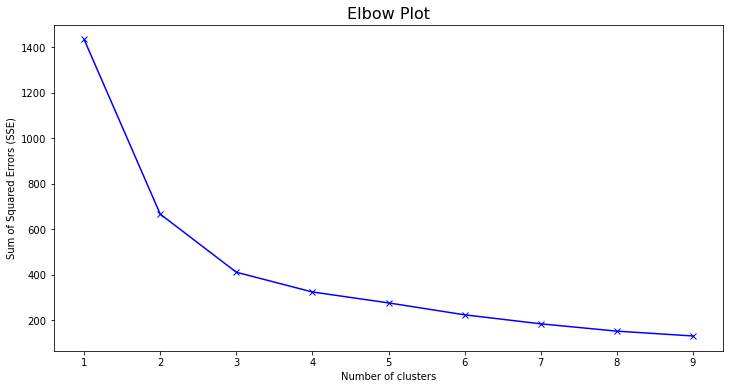

In [287]:
from kneed import KneeLocator

plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
kn = KneeLocator(K, distortions, direction='decreasing')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot', fontsize=16)
plt.show()



### Optimal number of clusters is 3, therefore apply the k-means algorithm with the number of k set to 3

In [288]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(ikea_data_after_pca)

KMeans(n_clusters=3)

### Create a column for the labels 

In [289]:
ikea_data['Clusters'] = kmeans.labels_.tolist()

### Check the data frame again

In [290]:
ikea_data

,Kommun_code,Year,Kommun_name,Revenue,Number_of_Employees,Population,Population_University,Percent_University,Productivity,SalesIndex,Clusters
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,2
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,2
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0
...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,2
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0


### Append a column named 'has_IKEA' to the data frame and set it to 0 as a default value

In [291]:
ikea_data["has_IKEA"] = 0 

### Create a list with all the municipalities names that have an IKEA

In [292]:
name_list = ["Borlänge","Gävle","Göteborg","Haparanda","Helsingborg","Jönköping","Kalmar"
            ,"Karlstad","Linköping", "Malmö", "Stockholm", "Sundsvall", "Uddevalla", "Umeå"
            ,"Uppsala", "Västerås", "Älmhult","Örebro"]

### Update the has_ikea column by setting it to 1 for municipalities that already have IKEA

In [293]:
for name in name_list:
     ikea_data.loc[(ikea_data['Kommun_name']==name), 'has_IKEA'] = 1

### Check the updated dataframe

In [294]:
ikea_data

,Kommun_code,Year,Kommun_name,Revenue,Number_of_Employees,Population,Population_University,Percent_University,Productivity,SalesIndex,Clusters,has_IKEA
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,2,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,2,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,2,1
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


### Analyse the clusters by population

In [295]:
ikea_data["Population"].groupby(ikea_data["Clusters"]).describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,177.0,19891.514124,14041.884470,3672.0,10177.0,14840.0,26304.0,82608.0
1,1.0,847073.000000,NaN,847073.0,847073.0,847073.0,847073.0,847073.0
2,29.0,95952.137931,53193.842764,31330.0,64032.0,85753.0,110488.0,298963.0


### The three clusters are separated into small, medium, and large municipalities as observed by the population mean

### Now check each cluster individually

### Cluster 0

In [296]:
ikea_data.loc[ikea_data['Clusters'] == 0]

,Kommun_code,Year,Kommun_name,Revenue,Number_of_Employees,Population,Population_University,Percent_University,Productivity,SalesIndex,Clusters,has_IKEA
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,1862,2010,Degerfors,56,27,9641,483,0.050099,103.94367,5.770170,0,0
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


### Cluster 1

In [297]:
ikea_data.loc[ikea_data['Clusters'] == 1]

,Kommun_code,Year,Kommun_name,Revenue,Number_of_Employees,Population,Population_University,Percent_University,Productivity,SalesIndex,Clusters,has_IKEA
19,180,2010,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,1


### Cluster 2

In [298]:
ikea_data.loc[ikea_data['Clusters'] == 2]

,Kommun_code,Year,Kommun_name,Revenue,Number_of_Employees,Population,Population_University,Percent_University,Productivity,SalesIndex,Clusters,has_IKEA
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,2,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,2,1
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,2,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,2,0
16,160,2010,Täby,3441,1546,63789,13442,0.210726,111.54470,354.556345,2,0
17,162,2010,Danderyd,500,272,31330,8448,0.269646,92.12444,51.519376,2,0
18,163,2010,Sollentuna,2393,1116,64630,12322,0.190654,107.46134,246.571733,2,0
20,181,2010,Södertälje,2191,894,86246,8734,0.101268,122.82270,225.757905,2,0
21,182,2010,Nacka,3104,1489,90108,17871,0.198329,104.47221,319.832286,2,0
23,184,2010,Solna,1491,847,68144,16038,0.235355,88.22019,153.630779,2,0


### We observe that cluster 1 includes only Stockholm that already has an IKEA. Therefore we focus only on the other two clusters.

In [299]:
ikea_data[['Clusters','Revenue', 'Population','SalesIndex','Population_University']].groupby('Clusters').mean().head()

,Revenue,Population,SalesIndex,Population_University
Clusters,,,,
0,383.847458,19891.514124,39.551163,1898.355932
1,32897.000000,847073.000000,3389.665819,191585.000000
2,3887.758621,95952.137931,400.589796,15070.620690


### We observe that Cluster 2 has higher average Revenue and Sales compared to cluster 0, therefore the new IKEA location should be chosen from within that cluster

### Below we can see all the possible locations for a new IKEA store

In [304]:
new_IKEA_locations =ikea_data[(ikea_data["Clusters"] == 2) &(ikea_data["has_IKEA"]==0) ].sort_values(by = ['Revenue','SalesIndex','Population'], ascending=False)
new_IKEA_locations

,Kommun_code,Year,Kommun_name,Revenue,Number_of_Employees,Population,Population_University,Percent_University,Productivity,SalesIndex,Clusters,has_IKEA
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,2,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,2,0
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,2,0
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,2,0
165,1481,2010,Mölndal,3512,1487,60973,9962,0.163384,118.36336,361.872096,2,0
16,160,2010,Täby,3441,1546,63789,13442,0.210726,111.54470,354.556345,2,0
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,2,0
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,2,0
77,780,2010,Växjö,3268,1315,83005,12266,0.147774,124.54608,336.730641,2,0
130,1380,2010,Halmstad,3196,1437,91800,11604,0.126405,111.46121,329.311851,2,0
